# 前言
参考：https://blog.csdn.net/liujh845633242/article/details/89374023

我们通过电视观看体育比赛，在电视的纯平显示器上有一个球。显示器大概包含了100万像素，而球则可能是由较少的像素组成的，比如1000像素。在大部分体育比赛中，我们关注的是给定时刻球的位置。人的大脑要想了解比赛的进展，就需要了解球在运动场中的位置，在这个场景中，人们实时地将显示器上的百万像素转换成了一个三维的图像，该图像就给出了**运动场上球的位置**。在这个过程中，人们已经将数据从一百万维降至了三维。

  在上述的体育比赛中，人们面对的原本是百万像素的数据，但是只有**球的三维位置才最重要**，这就被称为**降维**（dimensionality reduction）。

# 降维技术
  **降维**是对数据高维度特征的一种**预处理方法**。将高维度的数据保留下最重要的一些特征，去除噪声和不重要的特征，从而实现提升数据处理速度的目的。在实际的生产和应用中，**降维在一定的信息损失范围内**，可以为我们节省大量的时间和成本。降维也成为了应用非常广泛的数据预处理方法。
  
**1、降维作用**：

使得数据集更易使用

降低很多算法的计算开销

去除噪声

使得结果易懂

**2、常用的降维方法**：

**主成分分析PCA（Principal Component Analysis）**

在PCA中，数据从原来的坐标系转换到了新的坐标系，新坐标系的选择是由数据本身决定的。第一个新坐标轴选择的是原始数据中**方差最大的方向**，第二个坐标轴的选择和第一个坐标轴**正交且有最大方差**的方向。该过程一直重复，重复**次数**为原始数据中特征的数目。我们会发现，大部分方差都包含在最前面的几个新坐标轴中。因此，我们可以**忽略余下的坐标轴**，即对数据进行降维处理。

**因子分析（Factor Analysis）**

假设在观察数据的生成中有一些观察不到的**隐变量**。假设观察数据是这些隐变量和某些噪声的**线性组合**。那么隐变量的数据可能比观察数据的数目少，也就是说通过找隐变量就可以实现数据的降维。


**独立成分分析ICA（Independent Component Analysis）**
ICA假设数据是从N个数据源生成的，这一点和因子分析有些类似。假设数据为多个数据源的混合观察结果，这些数据源之间在统计上是相互独立的，而在PCA中只假设数据是不相关的。同因子分析一样，如果数据源的数目少于观察数据的数目，则可以实现降维过程。

在上述3种降维技术中，**PCA的应用目前最为广泛**。所以，我们主要来介绍PCA降维技术。

# 主成分分析--PCA
## PCA的数学原理

一般情况下，在数据挖掘和机器学习中，数据被表示为向量。例如某个淘宝店2012年全年的流量及交易情况可以看成一组记录的集合，其中每一天的数据是一条记录，格式如下：

$$\mathit{\left ( 日期, 浏览量, 访客数, 下单数, 成交数, 成交金额 \right )}$$

  其中“日期”是一个记录标志而非度量值，而数据挖掘关心的大多是度量值，因此如果我们忽略日期这个字段后，我们得到一组记录，每条记录可以被表示为一个五维向量，其中一条看起来大约是这个样子：

$$\left ( 500,240,25,13,2312.15 \right )^T$$

这里用了转置，因为习惯上使用列向量表示一条记录（后面会看到原因），本文后面也会遵循这个准则。不过为了方便有时我会省略转置符号，但我们说到向量默认都是指**列向量**。

### 向量内积与投影
  下面先来看一个高中就学过的向量运算：**内积**。两个维数相同的向量的内积被定义为：
$$(a_1,a_2,\dots,a_n)^T⋅(b_1,b_2,\dots,b_n)=a_1b_1+a_2b_2+\dots+a_nb_n$$
  内积运算将两个向量映射为一个实数。其计算方式非常容易理解，但是其意义并不明显。下面我们分析内积的**几何意义**。假设A和B是两个n维向量，我们知道n维向量可以等价表示为n维空间中的一条从原点发射的有向线段，为了简单起见我们**假设A和B均为二维向量**，则$A=(x_1,y_1)，B=(x_2,y_2)$。则在二维平面上A和B可以用两条发自原点的有向线段表示，见下图：![jupyter](./img/PCA-1.png)

  从A点向B所在直线引一条垂线，垂线与B的交点叫做**A在B上的投影**，再设A与B的夹角是a，则**投影的矢量长度**为 $∣A∣cos(a)$，其中**向量A的模**$|A|=\sqrt{x_1^2+y_1^2}$，也就是A线段的标量长度。

  注意这里我们专门区分了矢量长度和标量长度，标量长度总是大于等于0，值就是线段的长度；而矢量长度可能为负，其绝对值是线段长度，而符号取决于其方向与标准方向相同或相反。
  
  到这里还是看不出内积和这东西有什么关系，不过如果我们将内积表示为另一种我们熟悉的形式：$$A⋅B=∣A∣∣B∣cos(a)$$
  可以看到：**A与B的内积等于A到B的投影长度乘以B的模**。再进一步，如果我们假设B的模为1，即让|B|=1，那么就变成了：$$A⋅B=∣A∣cos(a)$$
  也就是说，设向量B的模为1，则**A与B的内积值等于A向B所在直线投影的矢量长度！这就是内积的一种几何解释，也是我们得到的第一个重要结论**。在后面的推导中，将反复使用这个结论。

### 基
下面我们继续在二维空间内讨论向量。上文说过，一个二维向量可以对应二维笛卡尔直角坐标系中从原点出发的一个有向线段。在代数表示方面，我们经常用线段终点的**点坐标**表示向量，这个坐标本身是不能够精确表示一个向量的。说到坐标，实际上表示的是向量在x轴、y轴上的投影值。
  
更正式的说，向量(x,y)实际上表示线性组合：$$x(1,0)^T+y(0,1)^T$$所有二维向量都可以表示为这样的线性组合。此处(1,0)和(0,1)叫做二维空间中的一组基。
  
所以，要准确描述向量，首先要确定一组基，然后给出在基所在的各个直线上的投影值，就可以了。

我们之所以默认选择(1,0)和(0,1)为基，当然是比较方便，因为它们分别是x和y轴正方向上的**单位向量**，因此就使得二维平面上点坐标和向量一一对应，非常方便。但**实际上任何两个线性无关的二维向量都可以成为一组基**，所谓**线性无关**在二维平面内可以直观认为是两个不在一条直线上的向量。

成为一组基的唯一要求就是线性无关，非正交的基也是可以的。不过因为正交基有较好的性质，所以一般使用的基都是正交的。

### 基变换
一组向量的基变换被表示为矩阵的相乘。

一般的，如果我们有M个N维向量，想将其变换为由R个**N维向量**表示的新空间中，那么首先将**R个基**按行组成矩阵A，然后将向量按列组成矩阵B，那么两矩阵的乘积AB就是变换结果，其中AB的第m列为A中第m列变换后的结果。数学表示为：![jupyter](./img/PCA-2.png)其中$p_i$是一个行向量，表示第i个基，$a_j$是一个列向量，表示第 j个原始数据记录。

**特别要注意的是，这里R可以小于N**，而R决定了变换后数据的维数。也就是说，我们可以将一个N维数据变换到更低维度的空间中去，变换后的维度取决于基的数量。因此这种矩阵相乘的表示也可以表示**降维变换**。

上述分析同时给矩阵相乘找到了一种物理解释：**两个矩阵相乘的意义是将右边矩阵中的每一列列向量变换到左边矩阵中每一行行向量为基所表示的空间中去**。更抽象的说，一个矩阵可以表示一种线性变换。

要在二维平面中选择一个方向，将所有数据都投影到这个方向所在直线上，用投影值表示原始记录。这是一个实际的**二维降到一维**的问题。

那么如何选择这个方向（或者说基）才能尽量保留最多的原始信息呢？一种直观的看法是：**希望投影后的投影值尽可能分散**。如下图，二维转一维![jupyter](./img/PCA-3.png)

### 方差
投影后投影值尽可能分散，可以用数学上的方差来表述。方差可以看做是每个维的元素与维均值的差的平方和的均值，即：$$Var(a)=\frac{1}{m}\sum_i^m(a_i−μ)^2$$每个维都有一个均值和方差。

上面的二维降维问题被形式化表述为：寻找一个一维基，使得所有数据变换为这个基上的坐标表示后，**方差值最大**。

对于二维问题，存在两个方差，选择方差最大的维，其他一维丢弃。这样就将二维降为一维了。

### 协方差
对于上面二维降成一维的问题来说，找到那个使得方差最大的方向就可以了。

对于更高维，如考虑三维降到二维问题。与之前相同，首先我们希望找到一个方向使得投影后方差最大，这样就完成了第一个方向的选择，继而我们**选择第二个投影方向**。

如果我们还是单纯只选择方差最大的方向，如果这个方向与第一个方向应该是**“几乎重合在一起”**，显然这样的维度是没有用的，因此，应该有其他约束条件。从直观上说，让两个字段尽可能表示更多的原始信息，我们是不希望它们之间存在（线性）相关性的，因为**相关性意味着两个字段不是完全独立，必然存在重复表示的信息**。

数学上可以**用两个维的协方差表示其相关性**：$$Cov(a,b)=\frac{1}{m}\sum_i^m(a_i−μ_a)(b_i-u_b)$$

即协方差简洁的表示为内积除以元素数m。我们选择第二个基时只能在与第一个基**正交**的方向上选择。因此最终选择的两个方向一定是正交的。
  
至此，我们得到了**降维问题的优化目标**：将一组N维向量降为K维（K大于0，小于N），其目标是选择K个单位（模为1）正交基，使得原始数据变换到这组基上后，各字段两两间协方差为0，而字段（维）的方差则尽可能大（在正交的约束下，取最大的K个方差）。

### 协方差矩阵
设我们只有a和b两个字段（维），那么我们将它们按行组成矩阵X：![jupyter](./img/PCA-4.png)这个矩阵对角线上的两个元素分别是两个字段的方差，而其它元素是a和b的协方差。 **两者(方差和协方差)被统一到了一个矩阵**。

根据矩阵相乘的运算法则，这个结论很容易被**推广到一般情况**：

设我们有m个n维数据记录，将其按列排成n乘m的矩阵X，设$C=\frac{1}{m}XX^T$，则C是一个**对称矩阵**，其对角线分别是各个字段的方差，而第 i 行 j列和 j行 i列元素相同，表示 i和 j两个字段的协方差。

### 协方差矩阵对角化
根据上述推导，我们发现要达到优化目前，等价于将协方差矩阵对角化：**即除对角线外的其它元素化为0，并且在对角线上将元素按大小从上到下排列**，这样我们就达到了优化目的。这样说可能还不是很明晰，我们进一步看下原矩阵与基变换后矩阵协方差矩阵的关系

设原始数据矩阵X对应的协方差矩阵为C，而**P是一组基按行组成的矩阵**，设Y=PX，则Y为X对P做基变换后的数据。**设Y的协方差矩阵为D**，我们推导一下D与C的关系：![jupyter](./img/PCA-5.png)

现在事情很明白了！我们要找的P不是别的，而是能让原始协方差矩阵对角化的P。换句话说，**优化目标变成了寻找一个矩阵P，满足 $PCP^T$是一个对角矩阵，并且对角元素按从大到小依次排列，那么P的前K行就是要寻找的基**，用P的前K行组成的矩阵乘以 X 就使得 X 从N维降到了K维并满足上述优化条件。

现在所有焦点都聚焦在了协方差矩阵对角化问题上，有时，我们真应该感谢数学家的先行，因为矩阵对角化在线性代数领域已经属于被玩烂了的东西，所以这在数学上根本不是问题。

由上文知道，协方差矩阵C是一个是对称矩阵，在线性代数上，实对称矩阵有一系列非常好的性质：

(1) 实对称矩阵不同特征值对应的特征向量必然正交。

(2) 设特征向量λ重数为 ，则必然存在 r个线性无关的特征向量对应于λ，因此可以将这 r个特征向量单位正交化。

由上面两条可知，一个n行n列的实对称矩阵一定可以找到n个单位正交特征向量，设这n个特征向量为$e_1,e_2,\dots,e_n$，我们将其按列组成矩阵：$E=(e_1,e_2,\dots,e_n)$,则对协方差矩阵C有如下结论：![jupyter](./img/PCA-6.png)其中Λ为对角矩阵，其对角元素为各特征向量对应的特征值（可能有重复）。

以上结论不再给出严格的数学证明，对证明感兴趣的朋友可以参考线性代数书籍关于“实对称矩阵对角化”的内容。

到这里，我们发现我们已经找到了需要的矩阵P：$P=E^T$
P是协方差矩阵的特征向量单位化后按行排列出的矩阵，其中每一行都是 C 的一个特征向量。如果设 P 按照 Λ中特征值的从大到小，将特征向量从上到下排列，则用P的前K行组成的矩阵乘以原始数据矩阵X，就得到了我们需要的降维后的数据矩阵Y。

至此我们完成了整个PCA的数学原理讨论。

## PCA算法步骤

 设有m条 n维数据。
1. 将原始数据按列组成 n行 m列矩阵 X
2. 将 X的每一行（代表一个属性字段）进行零均值化，即减去这一行的均值
3. 求出协方差矩阵$C=\frac{1}{m}XX^T$
4. 求出协方差矩阵的特征值及对应的特征向量
5. 将特征向量按对应特征值大小从上到下按行排列成矩阵，取前k行组成矩阵 P
6. Y=PX即为降维到k维后的数据

## 在numpy中实现PCA
先打开“testSet.txt”文件，看一下数据集是什么样的。该数据集中有两列，都是数值类型的。

In [3]:
#在下面添加此代码以显示单元格中的所有输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

'\n函数说明：数据可视化\nParameters：\n    fileName：数据文件名\nReturns：\n    无\n'

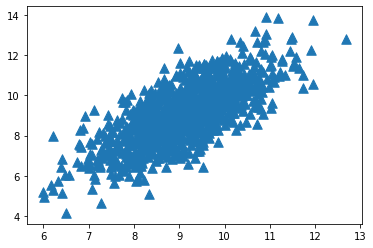

In [4]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return np.mat(datArr)

"""
函数说明：数据可视化
Parameters：
    fileName：数据文件名
Returns：
    无
"""
def ShowData(fileName):
    dataMat = loadDataSet(fileName)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:,0].flatten().A[0],dataMat[:,1].flatten().A[0],marker='^',s=90)
#    ax.scatter(reconMat[:,0].flatten().A[0],reconMat[:,1].flatten().A[0],marker='o',s=50,c='red')
    plt.show()

if __name__ == '__main__':
    ShowData('PCAtestSet.txt')

**（1）零均值化**
  假如原始数据集为矩阵dataMat，dataMat中每一行代表一个样本，每一列代表同一个特征。零均值化就是求每一列的平均值，然后该列上的所有数都减去这个均值。也就是说，这里零均值化是对每一个特征而言的，零均值化后，每个特征的均值变成0。实现代码如下：

In [5]:
"""
函数说明：零均值化
Parameters：
    dataMat：数据集
Returns：
    newData：去除均值后的数据
    meanVal：平均值
"""
def zeroMean(dataMat):
    meanVal = np.mean(dataMat, axis=0)  #按列求平均值
    newData = dataMat - meanVal  #减去平均值
    return newData, meanVal

'\n函数说明：零均值化\nParameters：\n    dataMat：数据集\nReturns：\n    newData：去除均值后的数据\n    meanVal：平均值\n'

**2）求协方差矩阵**
numpy中的cov函数用于求协方差矩阵，参数rowvar很重要！若rowvar=0，说明传入的数据一行代表一个样本，若非0，说明传入的数据一列代表一个样本。因为newData每一行代表一个样本，所以将rowvar设置为0。covMat即所求的协方差矩阵。

    newData, meanVal = zeroMean(dataMat)
    covMat = np.cov(newData, rowvar=0)

**（3）求特征值、特征矩阵**
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))

  调用numpy中的线性代数模块linalg中的eig函数，可以直接由covMat求得特征值和特征向量：eigVals存放特征值，行向量。eigVects存放特征向量，每一列代表一个特征向量。特征值和特征向量是一一对应的。

**（4）保留主要的成分[即保留值比较大的前n个特征]**
  第三步得到了特征值向量eigVals，假设里面有m个特征值，我们可以对其排序，排在前面的n个特征值所对应的特征向量就是我们要保留的，它们组成了新的特征空间的一组基n_eigVect。将零均值化后的数据乘以n_eigVect就可以得到降维后的数据。代码如下：
  
    eigValIndice=np.argsort(eigVals)            #对特征值从小到大排序    
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]   #最大的n个特征值的下标    
    n_eigVect=eigVects[:,n_eigValIndice]        #最大的n个特征值对应的特征向量    
    lowDDataMat=newData*n_eigVect               #低维特征空间的数据
    reconMat=(lowDDataMat*n_eigVect.T)+meanVal  #重构数据
    return lowDDataMat,reconMat
    
代码中有几点要说明一下，首先argsort对特征值是从小到大排序的，那么最大的n个特征值就排在后面，所以  eigValIndice[-1:-(n+1):-1]  就是根据特征值排序结果的逆序，取出这个n个最大的特征向量。【python里面，list[a：b：c] 代表从下标a开始到b，步长为c。】
  OK，这四步下来就可以从高维的数据dataMat得到低维的数据lowDDataMat，另外，程序也返回了重构数据reconMat，有些时候reconMat更便于数据分析。
  总的代码如下：

'\n函数说明：数据可视化\nParameters：\n    fileName：数据文件名\nReturns：\n    无\n'

'\n函数说明：零均值化\nParameters：\n    dataMat：数据集\nReturns：\n    newData：去除均值后的数据\n    meanVal：每个特征的平均值\n'

'\n函数说明：\nParameters：\n    dataMat：数据集\n    topNfeat：最大的特征数\nReturns：\n    lowDDataMat：低维特征空间的数据\n    reconMat：重构数据\n'

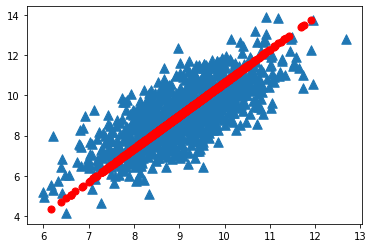

In [6]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return np.mat(datArr)

"""
函数说明：数据可视化
Parameters：
    fileName：数据文件名
Returns：
    无
"""
def ShowData(fileName):
    dataMat = loadDataSet(fileName)
    lowDMat, reconMat = pca(dataMat, 1)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:,0].flatten().A[0],dataMat[:,1].flatten().A[0],marker='^',s=90)
    ax.scatter(reconMat[:,0].flatten().A[0],reconMat[:,1].flatten().A[0],marker='o',s=50,c='red')
    plt.show()
"""
函数说明：零均值化
Parameters：
    dataMat：数据集
Returns：
    newData：去除均值后的数据
    meanVal：每个特征的平均值
"""
def zeroMean(dataMat):
    meanVal = np.mean(dataMat, axis=0)  #按列求平均值
    newData = dataMat - meanVal  #减去平均值
    return newData, meanVal
"""
函数说明：
Parameters：
    dataMat：数据集
    topNfeat：最大的特征数
Returns：
    lowDDataMat：低维特征空间的数据
    reconMat：重构数据
"""
def pca(dataMat, topNfeat=9999999):
    newData, meanVal = zeroMean(dataMat) #零均值化
    covMat = np.cov(newData, rowvar=0) #求协方差矩阵
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))  #求特征值、特征矩阵
    eigValIndice = np.argsort(eigVals) #对特征值从小到大排序
    n_eigValIndice = eigValIndice[-1:-(topNfeat+1):-1] #最大的topNfeat个特征值的下标
    n_eigVect = eigVects[:, n_eigValIndice]  #最大的topNfeat个特征值对应的特征向量
    lowDDataMat = newData * n_eigVect #低维特征空间数据
    reconMat = (lowDDataMat * n_eigVect.T) + meanVal #重构数据
    return lowDDataMat, reconMat
 
if __name__ == '__main__':
    ShowData('PCAtestSet.txt')

    lowDDataMat：低维特征空间的数据
    reconMat：重构数据

## 选择主成分个数
应用PCA的时候，对于一个1000维的数据，我们怎么知道要降到几维的数据才是合理的？**即  topNfeat要取多少，才能保留最多信息同时去除最多的噪声？**一般，我们是通过**方差百分比**来确定 topNfeat 的，有一条简单的公式，下面是该公式：![jupyter](./img/PCA-7.png)根据这条公式，可以写个函数，函数传入的参数是百分比percentage和特征值向量，然后根据percentage确定n，代码如下：

In [7]:
"""
函数说明：按照百分比来获取特征ges
Parameters：
    eigVals：特征值
    percentage：百分比
Returns：
    num：特征个数
"""
def percentage2n(eigVals, percentage):
    sortArray = np.sort(eigVals)  #升序
    sortArray = sortArray[-1::-1]  #降序
    arraySum = sum(sortArray)  #求特征值的和
    tmpSum = 0
    num = 0
    for i in sortArray:
        tmpSum += i   #最大k个特征值的总和
        num += 1
        if tmpSum >= arraySum*percentage:
            return num

'\n函数说明：按照百分比来获取特征ges\nParameters：\n    eigVals：特征值\n    percentage：百分比\nReturns：\n    num：特征个数\n'

那么pca函数也可以重写成百分比版本，默认百分比99%。

In [8]:
"""
函数说明：
Parameters：
    dataMat：数据集
    percentage：百分比
Returns：
    lowDDataMat：低维特征空间的数据
    reconMat：重构数据
"""
def pca(dataMat, percentage=0.99):
    newData, meanVal = zeroMean(dataMat) #零均值化
    covMat = np.cov(newData, rowvar=0) #求协方差矩阵
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))  #求特征值、特征矩阵
    n = percentage2n(eigVals, percentage) #要达到percent的方差百分比，需要前n个特征向量
    eigValIndice = np.argsort(eigVals) #对特征值从小到大排序
    n_eigValIndice = eigValIndice[-1:-(n+1):-1] #最大的topNfeat个特征值的下标
    n_eigVect = eigVects[:, n_eigValIndice]  #最大的topNfeat个特征值对应的特征向量
    lowDDataMat = newData * n_eigVect #低维特征空间数据
    reconMat = (lowDDataMat * n_eigVect.T) + meanVal #重构数据
    return lowDDataMat, reconMat

'\n函数说明：\nParameters：\n    dataMat：数据集\n    percentage：百分比\nReturns：\n    lowDDataMat：低维特征空间的数据\n    reconMat：重构数据\n'

**示例：利用PCA对半导体制造数据降维**
半导体是在一些极为先进的工厂中制造出来的。工厂或制造设备不仅需要花费上亿美元，而且还需要大量的工人。制造设备仅能在几年内保持其先进性，随后就必须更换了。单个集成电路的加工时间会超过一个月。在设备生命期有限，花费又极其巨大的情况下，制造过程中的每一秒都价值巨大。如果制造过程中存在瑕疵，我们就必须尽早发现，从而确保宝贵的时间不会花费在缺陷产品的生产上。

一些工程上的通用解决方案是通过早期测试和频繁测试来发现有缺陷的产品，但仍然有一些存在瑕疵的产品通过了测试。如果机器学习技术能够用于进一步减少错误，那么它就会为制造商节省大量的资金。

打开数据集，我们看到它包含了很多的特征，具体地讲，它拥有590个特征。我们的任务就是对这些特征进行降维处理。

该数据包含了很多的缺失值。这些缺失值是以nan（Not a Number的缩写）标识的。对于这些缺失值的处理办法，这里，我们用平均值来代替缺失值，平均值根据那些非nan得到。


'\n函数说明：将数据集中的NaN替换为平均值\nParameters：\n    无\nReturns：\n    datMat：处理之后的数据集\n'

90%的主成分方差总和： 81131452.77696125
前6个主成分的方差和： 87267225.1812216
0 主成分的方差百分比：59.25%
0 主成分的累积方差百分比：0.00%
1 主成分的方差百分比：24.12%
1 主成分的累积方差百分比：59.25%
2 主成分的方差百分比：9.15%
2 主成分的累积方差百分比：83.38%
3 主成分的方差百分比：2.30%
3 主成分的累积方差百分比：92.53%
4 主成分的方差百分比：1.46%
4 主成分的累积方差百分比：94.83%
5 主成分的方差百分比：0.52%
5 主成分的累积方差百分比：96.29%
6 主成分的方差百分比：0.32%
6 主成分的累积方差百分比：96.81%
7 主成分的方差百分比：0.31%
7 主成分的累积方差百分比：97.13%
8 主成分的方差百分比：0.26%
8 主成分的累积方差百分比：97.44%
9 主成分的方差百分比：0.23%
9 主成分的累积方差百分比：97.71%
10 主成分的方差百分比：0.22%
10 主成分的累积方差百分比：97.94%
11 主成分的方差百分比：0.21%
11 主成分的累积方差百分比：98.16%
12 主成分的方差百分比：0.17%
12 主成分的累积方差百分比：98.36%
13 主成分的方差百分比：0.13%
13 主成分的累积方差百分比：98.53%
14 主成分的方差百分比：0.12%
14 主成分的累积方差百分比：98.66%
15 主成分的方差百分比：0.11%
15 主成分的累积方差百分比：98.78%
16 主成分的方差百分比：0.11%
16 主成分的累积方差百分比：98.89%
17 主成分的方差百分比：0.09%
17 主成分的累积方差百分比：99.00%
18 主成分的方差百分比：0.09%
18 主成分的累积方差百分比：99.10%
19 主成分的方差百分比：0.09%
19 主成分的累积方差百分比：99.19%
20 主成分的方差百分比：0.07%
20 主成分的累积方差百分比：99.27%


([<matplotlib.axis.XTick at 0x1f98b921348>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 1.0, '方差百分比')

Text(0.5, 0, '主成分数目')

Text(0, 0.5, '方差的百分比')

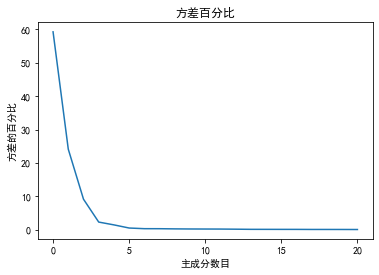

In [9]:
"""
函数说明：将数据集中的NaN替换为平均值
Parameters：
    无
Returns：
    datMat：处理之后的数据集
"""
def replaceNanWithMean():
    datMat = loadDataSet('PCAsecom.data',' ')
    numFeat = np.shape(datMat)[1]
    for i in range(numFeat):
        meanVal = np.mean(datMat[np.nonzero(~np.isnan(datMat[:,i].A))[0], i])
        datMat[np.nonzero(np.isnan(datMat[:,i].A))[0], i] = meanVal      
    return datMat

if __name__ == '__main__':
#    ShowData('testSet.txt')
    dataMat = replaceNanWithMean()
    meanRemoved, meanVal = zeroMean(dataMat) #零均值化
    covMat = np.cov(meanRemoved, rowvar=0)  #计算协方差矩阵
    eigVals, eigVects = np.linalg.eig(np.mat(covMat)) #特征值分析
    print("90%的主成分方差总和：",sum(eigVals)*0.9)     # 计算90%的主成分方差总和
    print("前6个主成分的方差和：",sum(eigVals[:6]))     # 计算前6个主成分所占的方差和
    percentage = []
    for i in range(21):
        p1 = eigVals[i]/sum(eigVals)
        p2 = sum(eigVals[:i])/sum(eigVals)
        percentage.append(p1*100)
        print(i,"主成分的方差百分比：{:.2%}".format(float(p1)))
        print(i,"主成分的累积方差百分比：{:.2%}".format(float(p2)))
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    
    plt.plot(percentage)    
    plt.xticks(np.linspace(0,20,5))  #设置x坐标轴的刻度，范围0-20，生成共5个点
    plt.title('方差百分比')
    plt.xlabel('主成分数目')
    plt.ylabel('方差的百分比')


    plt.show()

绘图输出了前20个主成分的总方差的百分比，从图中可以看出，大部分的方差都包含在前面的几个主成分中，舍弃后面的主成分并不会损失太多的信息。我们还可以打印出累计方差的百分比。跟书上是一样的。![jupyter](./PCA-8.png)上述分析能够得到所有用到的主成分数目，然后我们可以将该数目输入到PCA算法中，最后得到约简后的数据就可以在分类器中使用了。

# sklearn实现PCA
按照前面的思想，看一看出，PCA的一般步骤是：先对原始数据零均值化，然后求协方差矩阵，接着对协方差矩阵求特征向量和特征值，这些特征向量组成了新的特征空间。

## sklearn PCA类介绍

Python实现比较复杂，可以使用sklearn的模块中的功能。在scikit-learn中，与PCA相关的类都在sklearn.decomposition包中。最常用的**PCA类**就是sklearn.decomposition.PCA。

除了PCA类以外，最常用的PCA相关类还有**KernelPCA类**，它主要用于非线性数据的降维，需要用到核技巧。因此在使用的时候需要选择合适的核函数并对核函数的参数进行调参。

另外一个常用的PCA相关类是**IncrementalPCA类**，它主要是为了解决单机内存限制的。有时候我们的样本量可能是上百万+，维度可能也是上千，直接去拟合数据可能会让内存爆掉，此时我们可以用IncrementalPCA类来解决这个问题。IncrementalPCA先将数据分成多个batch，然后对每个batch依次递增调用partial_fit函数，这样一步步的得到最终的样本最优降维。

此外还有**SparsePCA**和**MiniBatchSparsePCA**。他们和上面讲到的PCA类的区别主要是使用了L1的正则化，这样可以将很多非主要成分的影响度降为0，这样在PCA降维的时候仅仅需要对那些相对比较主要的成分进行PCA降维，避免了一些噪声之类的因素对我们PCA降维的影响。SparsePCA和MiniBatchSparsePCA之间的区别则是MiniBatchSparsePCA通过使用一部分样本特征和给定的迭代次数来进行PCA降维，以解决在大样本时特征分解过慢的问题，当然，代价就是PCA降维的精确度可能会降低。使用SparsePCA和MiniBatchSparsePCA需要对L1正则化参数进行调参。

下面我们主要基于**sklearn.decomposition.PCA**来讲解如何使用scikit-learn进行PCA降维。PCA类基本不需要调参，一般来说，我们只需要指定我们需要降维到的维度，或者我们希望降维后的主成分的方差和占原始维度所有特征方差和的比例阈值就可以了。其函数原型如下：![jupyter](./img/PCA-9.png)


sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)

    参数：
     1）n_components: 这个参数可以帮我们指定希望PCA降维后的特征维度数目。最常用的做法是直接指定降维到的维度数目，此时n_components是一个大于等于1的整数。当然，我们也可以指定主成分的方差和所占的最小比例阈值，让PCA类自己去根据样本特征方差来决定降维到的维度数，此时n_components是一个（0，1]之间的数。当然，我们还可以将参数设置为"mle", 此时PCA类会用MLE算法根据特征的方差分布情况自己去选择一定数量的主成分特征来降维。我们也可以用默认值，即不输入n_components，此时n_components=min(样本数，特征数)。 
     2）copy:
        类型：bool，True或者False，缺省时默认为True。 
        意义：表示是否在运行算法时，将原始训练数据复制一份。若为True，则运行PCA算法后，原始训练数据的值不会有任何改变，因为是在原始数据的副本上进行运算；若为False，则运行PCA算法后，原始训练数据的值会改，因为是在原始数据上进行降维计算。
    3）whiten:判断是否进行白化。所谓白化，就是对降维后的数据的每个特征进行归一化，让方差都为1.对于PCA降维本身来说，一般不需要白化。如果你PCA降维后有后续的数据处理动作，可以考虑白化。默认值是False，即不进行白化。
    4)svd_solver：即指定奇异值分解SVD的方法，由于特征分解是奇异值分解SVD的一个特例，一般的PCA库都是基于SVD实现的。有4个可以选择的值：{‘auto’, ‘full’, ‘arpack’, ‘randomized’}。randomized一般适用于数据量大，数据维度多同时主成分数目比例又较低的PCA降维，它使用了一些加快SVD的随机算法。 full则是传统意义上的SVD，使用了scipy库对应的实现。arpack和randomized的适用场景类似，区别是randomized使用的是scikit-learn自己的SVD实现，而arpack直接使用了scipy库的sparse SVD实现。默认是auto，即PCA类会自己去在前面讲到的三种算法里面去权衡，选择一个合适的SVD算法来降维。一般来说，使用默认值就够了。  
    
在使用之前，下面的语句首先装入PCA类模块：

In [ ]:
from sklearn.decomposition import PCA

## PCA的属性和方法
**1.PCA属性：**
    
    components_ ：返回具有最大方差的成分。
    n_components_：返回所保留的成分个数n。
    mean_：
    noise_variance_：
    explained_variance_：它代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。
    explained_variance_ratio_：它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。,
    
**2.PCA方法**

**1)fit(X,y=None)**

    fit(X)，表示用数据X来训练PCA模型。
    函数返回值：调用fit方法的对象本身。比如pca.fit(X)，表示用X对pca这个对象进行训练。
    拓展：fit()可以说是scikit-learn中通用的方法，每个需要训练的算法都会有fit()方法，它其实就是算法中的“训练”这一步骤。因为PCA是无监督学习算法，此处y自然等于None。
**2)fit_transform(X)**

    用X来训练PCA模型，同时返回降维后的数据。
    newX=pca.fit_transform(X)，newX就是降维后的数据。
    
**3)inverse_transform()**

    将降维后的数据转换成原始数据，X=pca.inverse_transform(newX)
**4)transform(X)**

    将数据X转换成降维后的数据。当模型训练好后，对于新输入的数据，都可以用transform方法来降维。
 
此外，还有get_covariance()、get_precision()、get_params(deep=True)、score(X, y=None)等方法，以后用到再补充吧。

## 实例

**实例1**,首先生成随机数据并可视化

f:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


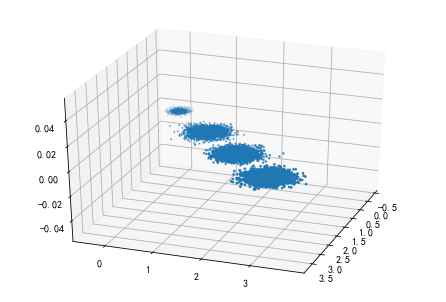

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
# make_nlobs方法常被用来生成聚类算法的测试数据
# make_blobs会根据用户指定的特征数量，中心点数量，范围等来生成几类数据
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类型 共10000个样本，每个样本3个特征，共4个簇
# n_samples表示产生多少个数据  n_features表示数据是几维，
# centers表示中心点 cluster_std表示分布的标准差
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3, 3, 3], [0, 0, 0], [1, 1, 1],
                [2, 2, 2]], cluster_std=[0.2, 0.1, 0.2, 0.2], random_state=9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o')
plt.show()

我们先只对数据进行投影，看看投影后的三个维度的方差分布，代码如下：

In [23]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

PCA(n_components=3)

[0.98318212 0.00850037 0.00831751]
[3.78521638 0.03272613 0.03202212]


可以看出投影后三个特征维度的方差比例大约为98.3%  0.8%  0.8% 。投影后第一个特征占了绝大多数的主成分比例。

现在我们来进行降维，从三维降到二维，代码如下：

In [24]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

PCA(n_components=2)

[0.98318212 0.00850037]
[3.78521638 0.03272613]


这个结果其实可以预料，因为上面三个投影后的特征维度的方差分别为：[3.78521638 0.03272613 0.03202212] ，投影到二维后选择的肯定是前两个特征，而抛弃第三个特征。

为了由直观的认识，我们看看此时转化后的数据分布，代码如下：

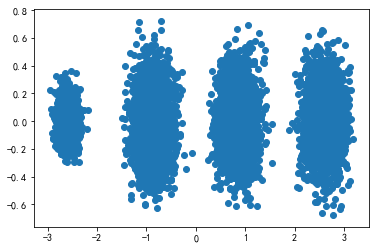

In [25]:
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

In [ ]:
现在我们 看看不直接指定降维的维度，而指定降维后的主成分方差和比例。

In [26]:
pca = PCA(n_components = 0.99)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

PCA(n_components=0.99)

[0.98318212 0.00850037]
[3.78521638 0.03272613]
2


看看让MLE算法自己选择降维维度的效果，代码如下

In [27]:
pca = PCA(n_components = 'mle')
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

PCA(n_components='mle')

[0.98318212]
[3.78521638]
1


**实例2：**
以鸢尾花分类为例，其中样本总数为150，鸢尾花的类别有三种，分别标记为0，1，2

In [11]:
#import matplotlib.pyplot as plt                 #加载matplotlib用于数据的可视化
from sklearn.decomposition import PCA           #加载PCA算法包
from sklearn.datasets import load_iris

data=load_iris()
y=data.target
x=data.data
pca=PCA(n_components=4)     #加载PCA算法，设置降维后主成分数目为2
newX=pca.fit_transform(x)#对样本进行降维
invX = pca.inverse_transform(newX)  #将降维后的数据转换成原始数据

print(pca.explained_variance_ratio_)  #方差百分比
print(pca.explained_variance_)  #特征的方差
print(pca.n_components_)#返回所保留的成分个数n。
print(pca.components_) #返回具有最大方差的成分。

[0.92461872 0.05306648 0.01710261 0.00521218]
[4.22824171 0.24267075 0.0782095  0.02383509]
4
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


我们所训练的pca对象的n_components值为4，即保留4个特征，第一个特征占所有特征的方差百分比为0.92461872，意味着几乎保留了所有的信息。即第一个特征可以92.46%表达整个数据集，因此我们可以降到1维：

In [12]:
pca = PCA(n_components='mle') #加载PCA算法，设置降维后主成分数目为2
newX=pca.fit_transform(x)#对样本进行降维
invX = pca.inverse_transform(newX)  #将降维后的数据转换成原始数据

print(pca.explained_variance_ratio_)  #方差百分比
print(pca.explained_variance_)  #特征的方差
print(pca.n_components_)#返回所保留的成分个数n。
print(pca.components_) #返回具有最大方差的成分。
pca.get_params  

[0.92461872 0.05306648 0.01710261]
[4.22824171 0.24267075 0.0782095 ]
3
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]


<bound method BaseEstimator.get_params of PCA(n_components='mle')>

运行结果显示了降维后的数据。所训练的pca对象的n_components值为自适应的，即保留3个特征，占所有特征的方差百分比为0.9983，意味着几乎保留了所有的信息。get_params返回各个参数的值

# 总结
降维技术使得数据变得更容易使用，并且它们往往能去除数据中的噪声

PCA可以从数据中识别出主要特征，他是通过沿着数据最大方差方向旋转坐标轴来实现的，选择方差最大的方向作为第一条坐标轴，后续坐标轴则与前面的坐标轴正交。

PCA算法降低数据的复杂性，识别最重要的多个特征，主要优点有：

    1）仅仅需要以方差衡量信息量，不受数据集以外的因素影响。　
    2）各主成分之间正交，可消除原始数据成分间的相互影响的因素。
    3）计算方法简单，主要运算是特征值分解，易于实现。

PCA算法有可能损失有用数据，主要缺点有：

    1）主成分各个特征维度的含义具有一定的模糊性，不如原始样本特征的解释性强。
    2）方差小的非主成分也可能含有对样本差异的重要信息，因降维丢弃可能对后续数据处理有影响。

降维技术使得数据变得更好使用，并且他们往往能去除数据中的噪声，使得其他机器学习的任务更加精确，降维往往作为数据预处理步骤，在数据应用到其他算法之前清洗数据，这其中独立成分分析法、因子分析法和主成分分析法比较流行。PCA可以从数据中识别其主要特征，通过沿着数据最大化方差方向旋转坐标轴来实现的，选择方差最大的方向作为第一条坐标轴，后续坐标轴与前面的坐标轴正交，协方差矩阵上特征值分析可以用一系列的正交坐标轴来获取。